In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 19.4 MB/s eta 0:00:00


In [ ]:
save_path = '/content/drive/MyDrive/ThesisNewApproach/Saved/highepoch/Model/'
save_path1 = '/content/drive/MyDrive/ThesisNewApproach/Saved/highepoch/Weight/'
save_path2 = '/content/drive/MyDrive/ThesisNewApproach/Saved/highepoch/Loss/'

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from tqdm.notebook import tqdm
from zipfile import ZipFile
from imutils import paths
tf.random.set_seed(666)
np.random.seed(666)

tfds.disable_progress_bar()
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import tensorflow as tf
#import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob
import shutil
import pathlib
import random

#model selection
from sklearn.model_selection import train_test_split

#data augumentation
import  cv2
import imgaug
import imageio
from imgaug import augmenters as iaa

##
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.applications import vgg16
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from tqdm.notebook import tqdm
from zipfile import ZipFile
from imutils import paths
tf.random.set_seed(666)
np.random.seed(666)

tfds.disable_progress_bar()
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from tqdm.notebook import tqdm
from zipfile import ZipFile
from imutils import paths
tf.random.set_seed(666)
np.random.seed(666)

tfds.disable_progress_bar()
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Run from here
import os
x_train = []
y_train = []
x_train = np.load("/content/drive/MyDrive/ThesisNewApproach/Dataset/NewData/TrainData.npy")
y_train = np.load("/content/drive/MyDrive/ThesisNewApproach/Dataset/NewData/TrainLabels.npy")

x_val = []
y_val = []
x_val = np.load("/content/drive/MyDrive/ThesisNewApproach/Dataset/NewData/ValData.npy")
y_val = np.load("/content/drive/MyDrive/ThesisNewApproach/Dataset/NewData/ValLabels.npy")

x_test = []
y_test = []
x_test = np.load("/content/drive/MyDrive/ThesisNewApproach/Dataset/NewData/TestData.npy")
y_test = np.load("/content/drive/MyDrive/ThesisNewApproach/Dataset/NewData/TestLabels.npy")

print(f"x_train shape: {x_train .shape} - y_train shape: {y_train .shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test .shape}")

x_train shape: (18123, 110, 110, 3) - y_train shape: (18123,)
x_val shape: (648, 110, 110, 3) - y_val shape: (648,)
x_test shape: (812, 110, 110, 3) - y_test shape: (812,)


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.02),
        layers.RandomWidth(0.2),
        layers.RandomHeight(0.2),
    ]
)

data_augmentation.layers[0].adapt(x_train)

In [ ]:
img_heigth, img_width = 110,110
input_shape = (img_heigth, img_width, 3)
num_classes = 5

In [ ]:
def create_encoder():
    vgg16 = keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, weights=None, input_shape=input_shape, pooling="avg"
    )

    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    outputs = vgg16(augmented)
    model = keras.Model(inputs=inputs, outputs=outputs, name="mobilenet-encoder")
    return model


encoder = create_encoder()
encoder.summary()

learning_rate = 0.0001
batch_size = 32
hidden_units = 512
projection_units = 128
num_epochs = 50
dropout_rate = 0.5
temperature = 0.05

Model: "mobilenet-encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     7         
                                                                 
 mobilenetv2_1.00_110 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
Total params: 2,257,991
Trainable params: 2,223,872
Non-trainable params: 34,119
_________________________________________________________________


In [ ]:
def create_classifier(encoder, trainable=True):

    for layer in encoder.layers:
        layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="mobilenet-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [ ]:
checkpointer = ModelCheckpoint(filepath='saved_models/baseline_model_mobilenet.hdf5', 
                               monitor='sparse_categorical_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-5)
callbacks=[early_stopping, reduce_lr, checkpointer]

# Baseline

In [ ]:
encoder = create_encoder()
classifier = create_classifier(encoder)
classifier.summary()

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs,callbacks=callbacks)

Model: "mobilenet-classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 mobilenet-encoder (Function  (None, 1280)             2257991   
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                              

In [ ]:
classifier.save(save_path + 'Contrastive_Baseline_mobilenet.h5')
#classifier.save_weights(save_path1 + "Weights_Contrastive_Baseline_mobilenet.h5")

In [ ]:
vgg19_base_trainloss_dict = {}
vgg19_base_valloss_dict = {}

26/26 [==============================] - 1s 27ms/step


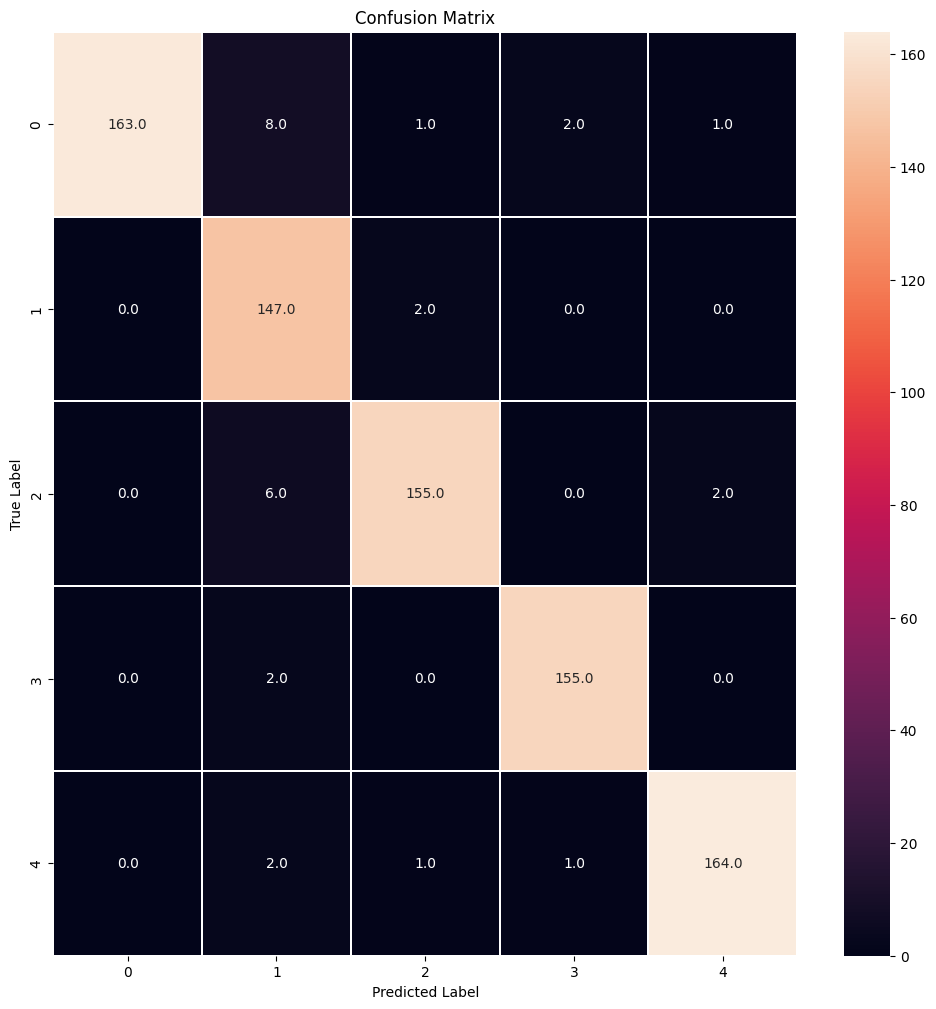

In [ ]:
pred = classifier.predict(x_test)

y_pred = np.argmax(pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_test)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
#ax.xaxis.set_ticklabels(x_test.class_indices)
#ax.yaxis.set_ticklabels(y_test)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report_base = classification_report(y_test, y_pred, output_dict=True)
df12 = pd.DataFrame(report_base).transpose()
df12

,precision,recall,f1-score,support
0,0.931429,1.000000,0.964497,163.000000
1,0.986577,0.890909,0.936306,165.000000
2,0.950920,0.974843,0.962733,159.000000
3,0.987261,0.981013,0.984127,158.000000
4,0.976190,0.982036,0.979104,167.000000
accuracy,0.965517,0.965517,0.965517,0.965517
macro avg,0.966476,0.965760,0.965353,812.000000
weighted avg,0.966522,0.965517,0.965247,812.000000


In [ ]:
from tensorflow.keras.models import load_model
baseline_mobilenet=load_model(save_path + 'Contrastive_Baseline_mobilenet.h5')


In [ ]:
accuracy = baseline_mobilenet.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

26/26 [==============================] - 2s 18ms/step - loss: 0.0982 - sparse_categorical_accuracy: 0.9655
Test accuracy: 96.55%


In [ ]:
classifier=baseline_mobilenet
y_predict = np.argmax(classifier.predict(x_test), axis=-1)

26/26 [==============================] - 1s 11ms/step


26/26 [==============================] - 0s 11ms/step


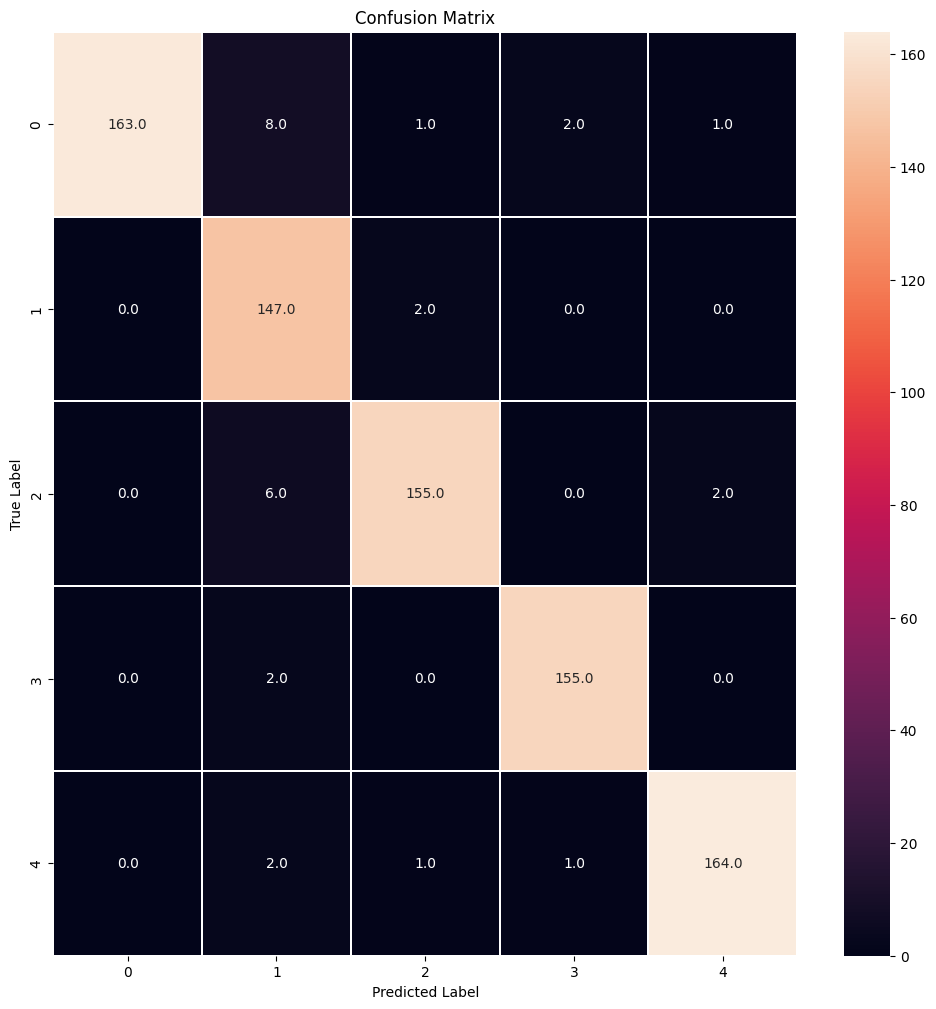

In [ ]:
cancer_classes=np.unique(y_test)

pred = baseline_mobilenet.predict(x_test)

y_pred = np.argmax(pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_test)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(cancer_classes)
ax.yaxis.set_ticklabels(cancer_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report_base = classification_report(y_test, y_pred, target_names=cancer_classes, output_dict=True)
df12 = pd.DataFrame(report_base).transpose()
df12

,precision,recall,f1-score,support
0,0.931429,1.000000,0.964497,163.000000
1,0.986577,0.890909,0.936306,165.000000
2,0.950920,0.974843,0.962733,159.000000
3,0.987261,0.981013,0.984127,158.000000
4,0.976190,0.982036,0.979104,167.000000
accuracy,0.965517,0.965517,0.965517,0.965517
macro avg,0.966476,0.965760,0.965353,812.000000
weighted avg,0.966522,0.965517,0.965247,812.000000


# N-pair loss

In [ ]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super().__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)


def add_projection_head(encoder):
    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    outputs = layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=inputs, outputs=outputs, name="mobilenet-encoder_with_projection-head"
    )
    return model

In [ ]:
encoder = create_encoder()

encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=SupervisedContrastiveLoss(temperature),
)

encoder_with_projection_head.summary()

history = encoder_with_projection_head.fit(
    x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs
)

Model: "mobilenet-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 mobilenet-encoder (Function  (None, 1280)             2257991   
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
Total params: 2,421,959
Trainable params: 2,387,840
Non-trainable params: 34,119
_________________________________________________________________
Epoch 1/50
567/567 [==============================] - 54s 45ms/step - loss: 3.3203
Epoch 2/50
567/567 [==============================] - 26s 45ms/step - loss: 3.2307
Epoch 3/50
567/567 [=========================

In [ ]:
encoder_with_projection_head.save(save_path + 'Contrastive_npairloss_mobilenet.h5')
#encoder_with_projection_head.save_weights(save_path1 + "Weights_Contrastive_npairloss_mobilenet.h5")

In [ ]:
vgg19_npair_trainloss_dict = {}
vgg19_npair_valloss_dict = {}

In [ ]:
classifier = create_classifier(encoder, trainable=False)

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs,callbacks=callbacks)

Epoch 1/50
567/567 [==============================] - ETA: 0s - loss: 0.3612 - sparse_categorical_accuracy: 0.8789
Epoch 1: sparse_categorical_accuracy did not improve from 0.89323
567/567 [==============================] - 13s 16ms/step - loss: 0.3612 - sparse_categorical_accuracy: 0.8789 - lr: 1.0000e-04
Epoch 2/50
567/567 [==============================] - ETA: 0s - loss: 0.2843 - sparse_categorical_accuracy: 0.9091
Epoch 2: sparse_categorical_accuracy improved from 0.89323 to 0.90912, saving model to saved_models/baseline_model_mobilenet.hdf5
567/567 [==============================] - 9s 16ms/step - loss: 0.2843 - sparse_categorical_accuracy: 0.9091 - lr: 1.0000e-04
Epoch 3/50
567/567 [==============================] - ETA: 0s - loss: 0.2694 - sparse_categorical_accuracy: 0.9079
Epoch 3: sparse_categorical_accuracy did not improve from 0.90912
567/567 [==============================] - 8s 15ms/step - loss: 0.2694 - sparse_categorical_accuracy: 0.9079 - lr: 1.0000e-04
Epoch 4/50
567

In [ ]:
classifier.save(save_path + 'Contrastive_npair_mobilenet.h5')
#classifier.save_weights(save_path1 + "Weights_Contrastive_npair_mobilenet.h5")

In [ ]:
accuracy = classifier.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

26/26 [==============================] - 3s 21ms/step - loss: 0.1296 - sparse_categorical_accuracy: 0.9581
Test accuracy: 95.81%


In [ ]:
y_predict = np.argmax(classifier.predict(x_test), axis=-1)

26/26 [==============================] - 2s 17ms/step


In [ ]:
confusion_matrix(y_test, y_predict)

array([[155,   4,   1,   1,   2],
       [  6, 151,   5,   2,   1],
       [  1,   2, 154,   1,   1],
       [  1,   0,   0, 157,   0],
       [  1,   1,   3,   1, 161]])

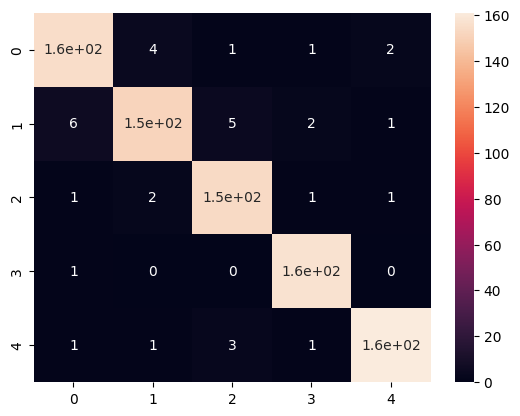

In [ ]:
cm = confusion_matrix(y_test, y_predict)
f = sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       163
           1       0.96      0.92      0.93       165
           2       0.94      0.97      0.96       159
           3       0.97      0.99      0.98       158
           4       0.98      0.96      0.97       167

    accuracy                           0.96       812
   macro avg       0.96      0.96      0.96       812
weighted avg       0.96      0.96      0.96       812



In [ ]:
npair_mobilenet=load_model(save_path + 'Contrastive_npair_mobilenet.h5')

In [ ]:
accuracy = npair_mobilenet.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

26/26 [==============================] - 1s 16ms/step - loss: 0.1296 - sparse_categorical_accuracy: 0.9581
Test accuracy: 95.81%


26/26 [==============================] - 1s 10ms/step


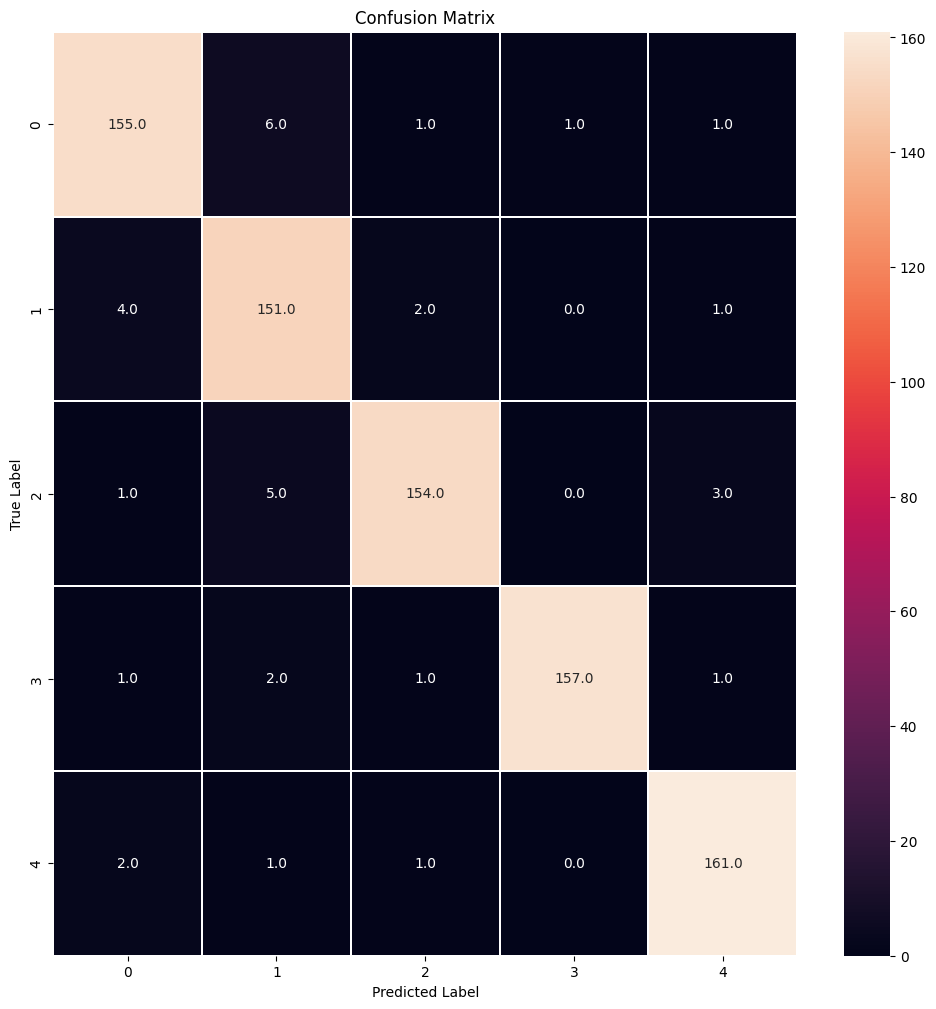

In [ ]:
pred = npair_mobilenet.predict(x_test)
cancer_classes=np.unique(y_test)
y_pred = np.argmax(pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_test)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(cancer_classes)
ax.yaxis.set_ticklabels(cancer_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report_npair = classification_report(y_test, y_pred, target_names=cancer_classes, output_dict=True)
df2 = pd.DataFrame(report_npair).transpose()
df2

,precision,recall,f1-score,support
0,0.945122,0.950920,0.948012,163.000000
1,0.955696,0.915152,0.934985,165.000000
2,0.944785,0.968553,0.956522,159.000000
3,0.969136,0.993671,0.981250,158.000000
4,0.975758,0.964072,0.969880,167.000000
accuracy,0.958128,0.958128,0.958128,0.958128
macro avg,0.958099,0.958474,0.958130,812.000000
weighted avg,0.958178,0.958128,0.957996,812.000000


# Xent loss

In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))

loss_history = LossHistory()

callbacks=[loss_history]

In [ ]:
class SupervisedNTXentLoss(Layer):
    def __init__(self, temperature=1.0, **kwargs):
        super(SupervisedNTXentLoss, self).__init__(**kwargs)
        self.temperature = temperature

    def call(self, y_true, y_pred):
        batch_size = tf.shape(y_pred)[0]
        feature_size = tf.shape(y_pred)[1]
        labels = tf.reshape(tf.range(batch_size), (batch_size, 1))
        masks = tf.cast(tf.eye(batch_size), dtype=bool)
        labels = tf.boolean_mask(labels, masks)
        similarity_matrix = tf.matmul(y_pred, y_pred, transpose_b=True)
        masks = tf.cast(tf.eye(batch_size), dtype=bool)
        similarity_matrix = tf.boolean_mask(similarity_matrix, ~masks)
        similarity_matrix = tf.reshape(similarity_matrix, (batch_size, batch_size - 1))
        labels = tf.squeeze(labels)  # Squeeze labels to remove extra dimension
        loss = tf.reduce_mean(
            tf.nn.sparse_softmax_cross_entropy_with_logits(
                labels=labels, logits=similarity_matrix / self.temperature
            )
        )
        return loss

In [ ]:
def add_projection_head(encoder):
    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    outputs = layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=inputs, outputs=outputs, name="MobileNetV2-encoder_with_projection-head"
    )
    return model

In [ ]:
import tensorflow.keras.utils as ku

y_train_onehot = ku.to_categorical(y_train)

In [ ]:
mobilenet_xentloss_dict={}

In [ ]:
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=SupervisedNTXentLoss(temperature),
)
encoder_with_projection_head.summary()

history = encoder_with_projection_head.fit(
    x=x_train, y=y_train_onehot, batch_size=batch_size, epochs=50, callbacks=callbacks
)

loss_dict = {}
for i, loss in enumerate(loss_history.losses):
    mobilenet_xentloss_dict[i+1] = loss

Model: "MobileNetV2-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 mobilenet-encoder (Function  (None, 1280)             2257991   
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 supervised_nt_xent_loss (Su  multiple                 0 (unused)
 pervisedNTXentLoss)                                             
                                                                 
Total params: 2,421,959
Trainable params: 2,387,840
Non-trainable params: 34,119
_________________________________________________________________
Epoch 1/50


In [ ]:
encoder_with_projection_head.save(save_path + 'lossxent_mobilenet.h5')

In [ ]:
import pickle

with open('/content/drive/MyDrive/ThesisNewApproach/Saved/highepoch/Loss/mobilenet_xentloss_dict.pkl', 'wb') as f:
    pickle.dump(mobilenet_xentloss_dict, f)


In [ ]:
with open('/content/drive/MyDrive/ThesisNewApproach/Saved/highepoch/Loss/mobilenet_xentloss_dict.pkl', 'rb') as f:
    mobilenet_xentloss_dict = pickle.load(f)

print("Loss values:")
for epoch, loss in mobilenet_xentloss_dict.items():
    print(f"Epoch {epoch}: {loss}")

Loss values:
Epoch 1: 8.565786361694336
Epoch 2: 3.4413723945617676
Epoch 3: 3.4365484714508057
Epoch 4: 3.4358139038085938
Epoch 5: 3.453132390975952
Epoch 6: 3.4341137409210205
Epoch 7: 3.433617353439331
Epoch 8: 3.433586597442627
Epoch 9: 3.43350887298584
Epoch 10: 3.433441400527954
Epoch 11: 3.4335477352142334
Epoch 12: 3.433478832244873
Epoch 13: 3.433349609375
Epoch 14: 3.4333178997039795
Epoch 15: 3.433744192123413
Epoch 16: 3.433300733566284
Epoch 17: 3.433302640914917
Epoch 18: 3.4333016872406006
Epoch 19: 3.433300256729126
Epoch 20: 3.433307409286499
Epoch 21: 3.4349074363708496
Epoch 22: 3.4332869052886963
Epoch 23: 3.4339094161987305
Epoch 24: 3.4332821369171143
Epoch 25: 3.433281183242798
Epoch 26: 3.433281183242798
Epoch 27: 3.433281421661377
Epoch 28: 3.433281183242798
Epoch 29: 3.433281183242798
Epoch 30: 3.4332826137542725
Epoch 31: 3.433281183242798
Epoch 32: 3.433281183242798
Epoch 33: 3.433281183242798
Epoch 34: 3.433281183242798
Epoch 35: 3.433281183242798
Epoch 36

In [ ]:
checkpointer = ModelCheckpoint(filepath='saved_models/baseline_model_mobilenet.hdf5', 
                               monitor='sparse_categorical_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-5)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
classifier = create_classifier(encoder, trainable=False)

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs,callbacks=callbacks)

Epoch 1/50
567/567 [==============================] - ETA: 0s - loss: 1.6801 - sparse_categorical_accuracy: 0.2416
Epoch 1: sparse_categorical_accuracy improved from -inf to 0.24157, saving model to saved_models/baseline_model_mobilenet.hdf5
567/567 [==============================] - 15s 19ms/step - loss: 1.6801 - sparse_categorical_accuracy: 0.2416 - lr: 1.0000e-04
Epoch 2/50
567/567 [==============================] - ETA: 0s - loss: 1.5886 - sparse_categorical_accuracy: 0.2690
Epoch 2: sparse_categorical_accuracy improved from 0.24157 to 0.26900, saving model to saved_models/baseline_model_mobilenet.hdf5
567/567 [==============================] - 13s 22ms/step - loss: 1.5886 - sparse_categorical_accuracy: 0.2690 - lr: 1.0000e-04
Epoch 3/50
567/567 [==============================] - ETA: 0s - loss: 1.5671 - sparse_categorical_accuracy: 0.2794
Epoch 3: sparse_categorical_accuracy improved from 0.26900 to 0.27937, saving model to saved_models/baseline_model_mobilenet.hdf5
567/567 [=====

In [ ]:
classifier.save(save_path + 'Contrastive_xent_mobilenet.h5')

In [ ]:
xent_mobilenet=load_model(save_path + 'Contrastive_xent_mobilenet.h5')

In [ ]:
accuracy = xent_mobilenet.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

26/26 [==============================] - 2s 33ms/step - loss: 1.4084 - sparse_categorical_accuracy: 0.4433
Test accuracy: 44.33%


26/26 [==============================] - 1s 12ms/step


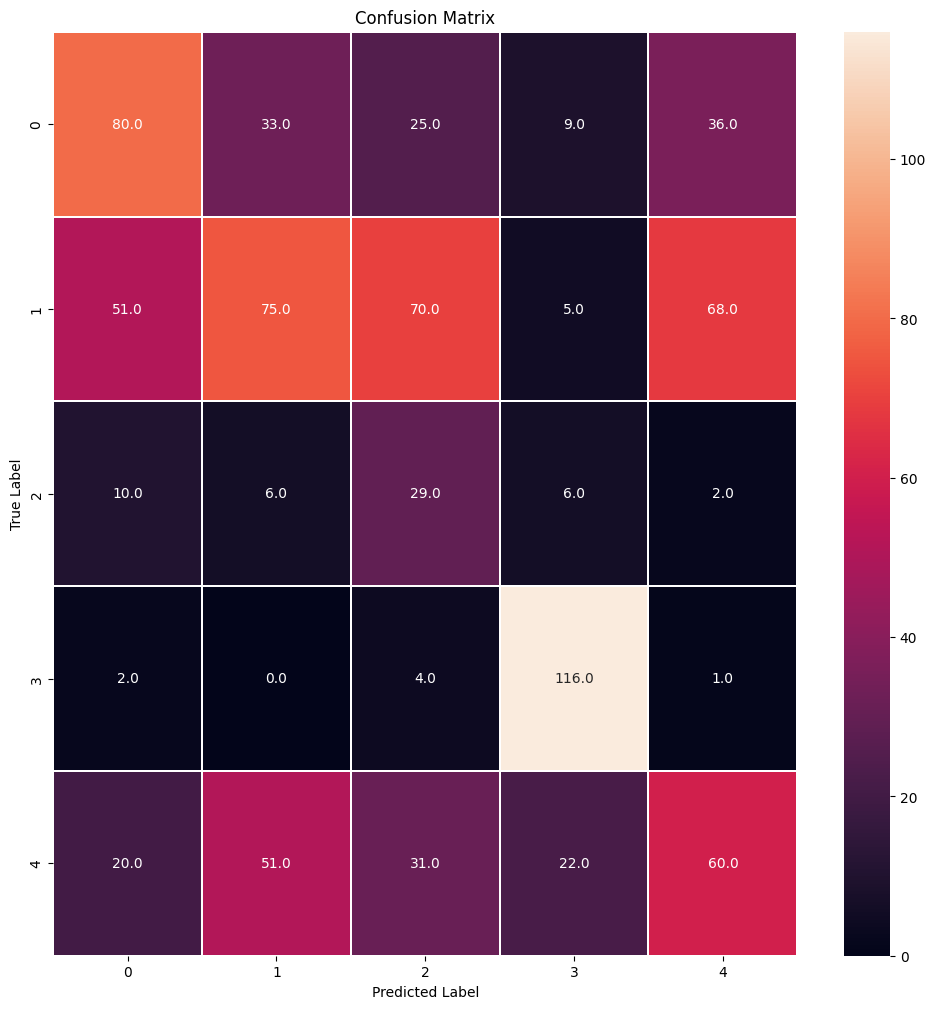

In [ ]:
pred = xent_mobilenet.predict(x_test)
cancer_classes=np.unique(y_test)
y_pred = np.argmax(pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_test)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(cancer_classes)
ax.yaxis.set_ticklabels(cancer_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report_npair = classification_report(y_test, y_pred, target_names=cancer_classes, output_dict=True)
df2 = pd.DataFrame(report_npair).transpose()
df2

,precision,recall,f1-score,support
0,0.437158,0.490798,0.462428,163.00000
1,0.278810,0.454545,0.345622,165.00000
2,0.547170,0.182390,0.273585,159.00000
3,0.943089,0.734177,0.825623,158.00000
4,0.326087,0.359281,0.341880,167.00000
accuracy,0.443350,0.443350,0.443350,0.44335
macro avg,0.506463,0.444238,0.449828,812.00000
weighted avg,0.502125,0.443350,0.447593,812.00000


# Triplet Loss

In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))

loss_history = LossHistory()

callbacks1=[loss_history]

In [ ]:
def triplet_loss(y_true, y_pred, alpha=0.2):     
    anchors = y_pred[0]
    positives = y_pred[1]
    negatives = y_pred[2]
    
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchors, positives)), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchors, negatives)), axis=-1)

    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0))

    return loss

In [ ]:
def add_projection_head(encoder):
    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    outputs = layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=inputs, outputs=outputs, name="MobileNetV2-encoder_with_projection-head"
    )
    return model

In [ ]:
import tensorflow.keras.utils as ku

y_train_onehot = ku.to_categorical(y_train)

In [ ]:
mobilenet_tripletloss_dict={}

In [ ]:
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=triplet_loss,
)
encoder_with_projection_head.summary()

history = encoder_with_projection_head.fit(
    x=x_train, y=y_train_onehot, batch_size=batch_size, epochs=50, callbacks=callbacks1
)

loss_dict = {}
for i, loss in enumerate(loss_history.losses):
    mobilenet_tripletloss_dict[i+1] = loss

Model: "MobileNetV2-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 mobilenet-encoder (Function  (None, 1280)             2257991   
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 128)               163968    
                                                                 
Total params: 2,421,959
Trainable params: 2,387,840
Non-trainable params: 34,119
_________________________________________________________________
Epoch 1/50
567/567 [==============================] - 55s 45ms/step - loss: 0.8180
Epoch 2/50
567/567 [==============================] - 25s 45ms/step - loss: 0.2820
Epoch 3/50
567/567 [=======================

In [ ]:
encoder_with_projection_head.save(save_path + 'losstriplet_mobilenet.h5')

In [ ]:
import pickle

with open('/content/drive/MyDrive/ThesisNewApproach/Saved/highepoch/Loss/mobilenet_tripletloss_dict.pkl', 'wb') as f:
    pickle.dump(mobilenet_tripletloss_dict, f)


In [ ]:
with open('/content/drive/MyDrive/ThesisNewApproach/Saved/highepoch/Loss/mobilenet_tripletloss_dict.pkl', 'rb') as f:
    mobilenet_tripletloss_dict = pickle.load(f)

print("Loss values:")
for epoch, loss in mobilenet_tripletloss_dict.items():
    print(f"Epoch {epoch}: {loss}")

Loss values:
Epoch 1: 0.8179699182510376
Epoch 2: 0.2819502651691437
Epoch 3: 0.24674129486083984
Epoch 4: 0.22892218828201294
Epoch 5: 0.20403681695461273
Epoch 6: 0.20078954100608826
Epoch 7: 0.20750834047794342
Epoch 8: 0.2902531921863556
Epoch 9: 0.20019471645355225
Epoch 10: 0.24486026167869568
Epoch 11: 0.20020058751106262
Epoch 12: 0.2045135796070099
Epoch 13: 0.2000134289264679
Epoch 14: 0.20051968097686768
Epoch 15: 0.2012549787759781
Epoch 16: 0.19999916851520538
Epoch 17: 0.19999948143959045
Epoch 18: 0.19999316334724426
Epoch 19: 0.19999897480010986
Epoch 20: 0.20000159740447998
Epoch 21: 0.2770814299583435
Epoch 22: 0.25064972043037415
Epoch 23: 0.19999897480010986
Epoch 24: 0.19999897480010986
Epoch 25: 0.19999265670776367
Epoch 26: 0.19999897480010986
Epoch 27: 0.19999855756759644
Epoch 28: 0.20000098645687103
Epoch 29: 0.20003007352352142
Epoch 30: 0.19999897480010986
Epoch 31: 0.19999897480010986
Epoch 32: 0.19999897480010986
Epoch 33: 0.19999897480010986
Epoch 34: 0.1

In [ ]:
classifier = create_classifier(encoder, trainable=False)

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs,callbacks=callbacks)

Epoch 1/50
567/567 [==============================] - ETA: 0s - loss: 1.6944 - sparse_categorical_accuracy: 0.2306
Epoch 1: sparse_categorical_accuracy did not improve from 0.32677
567/567 [==============================] - 12s 16ms/step - loss: 1.6944 - sparse_categorical_accuracy: 0.2306 - lr: 1.0000e-04
Epoch 2/50
567/567 [==============================] - ETA: 0s - loss: 1.6063 - sparse_categorical_accuracy: 0.2507
Epoch 2: sparse_categorical_accuracy did not improve from 0.32677
567/567 [==============================] - 8s 14ms/step - loss: 1.6063 - sparse_categorical_accuracy: 0.2507 - lr: 1.0000e-04
Epoch 3/50
565/567 [============================>.] - ETA: 0s - loss: 1.5922 - sparse_categorical_accuracy: 0.2628
Epoch 3: sparse_categorical_accuracy did not improve from 0.32677
567/567 [==============================] - 9s 16ms/step - loss: 1.5924 - sparse_categorical_accuracy: 0.2627 - lr: 1.0000e-04
Epoch 4/50
566/567 [============================>.] - ETA: 0s - loss: 1.5798 -

In [ ]:
classifier.save(save_path + 'Contrastive_triplet_mobilenet.h5')

In [ ]:
triplet_mobilenet=load_model(save_path + 'Contrastive_triplet_mobilenet.h5')

In [ ]:
accuracy = triplet_mobilenet.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

26/26 [==============================] - 2s 18ms/step - loss: 1.3654 - sparse_categorical_accuracy: 0.5616
Test accuracy: 56.16%


26/26 [==============================] - 1s 15ms/step


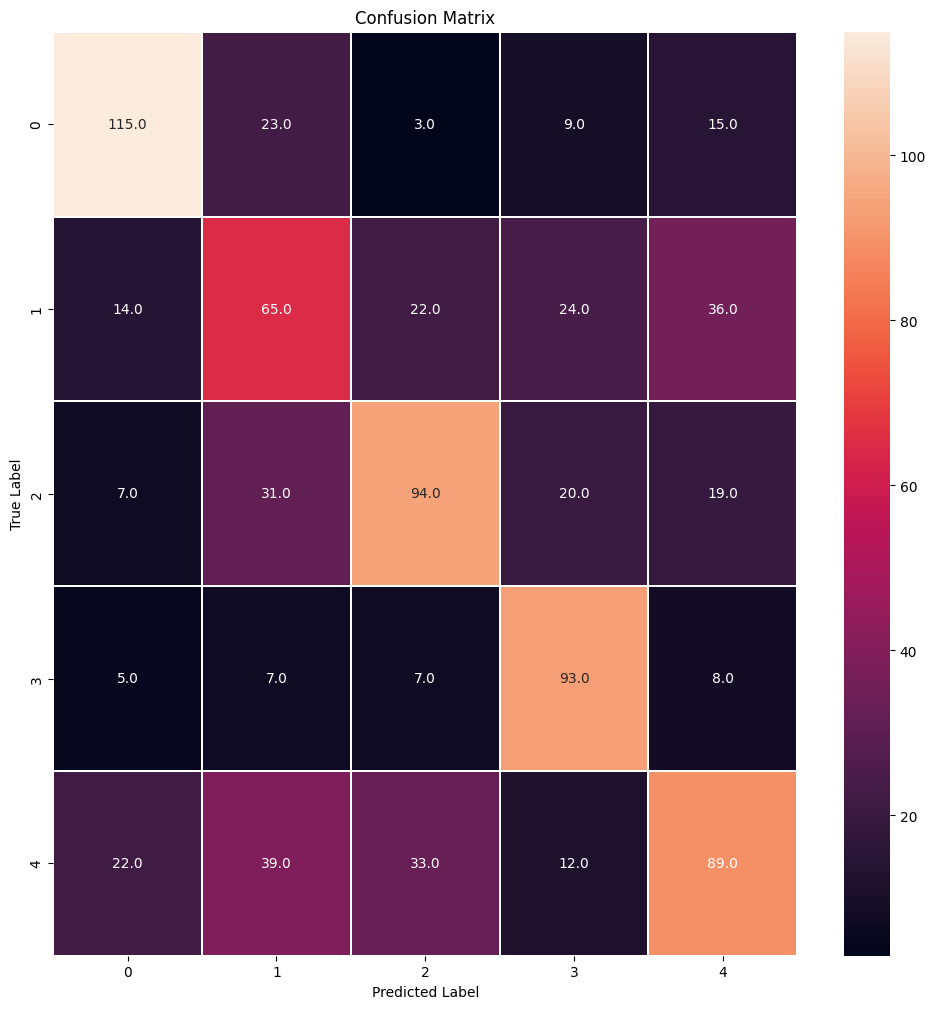

In [ ]:
pred = triplet_mobilenet.predict(x_test)
cancer_classes=np.unique(y_test)
y_pred = np.argmax(pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_test)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(cancer_classes)
ax.yaxis.set_ticklabels(cancer_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report_npair = classification_report(y_test, y_pred, target_names=cancer_classes, output_dict=True)
df2 = pd.DataFrame(report_npair).transpose()
df2

,precision,recall,f1-score,support
0,0.696970,0.705521,0.701220,163.000000
1,0.403727,0.393939,0.398773,165.000000
2,0.549708,0.591195,0.569697,159.000000
3,0.775000,0.588608,0.669065,158.000000
4,0.456410,0.532934,0.491713,167.000000
accuracy,0.561576,0.561576,0.561576,0.561576
macro avg,0.576363,0.562440,0.566093,812.000000
weighted avg,0.574255,0.561576,0.564663,812.000000
